In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load(n,target_df):
    deit = pd.read_csv(f'../../networks/birds_deit/inference_time/n{n}.csv',sep=';')
    levit = pd.read_csv(f'../../networks/birds_levit/inference_time/n{n}.csv',sep=';')
    effnet = pd.read_csv(f'../../networks/birds_effnet/inference_time/n{n}.csv',sep=';')
    
    df[f'deit_cpu_{n}'] = deit['cpu'] / n
    df[f'deit_gpu_{n}'] = deit['gpu'] / n
    df[f'levit_cpu_{n}'] = levit['cpu'] / n
    df[f'levit_gpu_{n}'] = levit['gpu'] / n
    df[f'effnet_cpu_{n}'] = effnet['cpu'] / n
    df[f'effnet_gpu_{n}'] = effnet['gpu'] / n

In [3]:
df = pd.DataFrame()
for i in range(1,1+8):
    load(i,df)
load(12,df)
load(16,df)
load(20,df)
load(24,df)
load(28,df)
load(32,df)
load(40,df)
load(48,df)
load(56,df)
load(64,df)
sel_columns_gpu = ['deit_gpu_16','levit_gpu_16','effnet_gpu_16']
sel_columns_cpu = ['deit_cpu_16','levit_cpu_16','effnet_cpu_16']

C:\Users\Simon\AppData\Local\Temp\ipykernel_18812\762967711.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'effnet_cpu_{n}'] = effnet['cpu'] / n
C:\Users\Simon\AppData\Local\Temp\ipykernel_18812\762967711.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'effnet_gpu_{n}'] = effnet['gpu'] / n
C:\Users\Simon\AppData\Local\Temp\ipykernel_18812\762967711.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider jo

In [4]:
cpu_mean = df[sel_columns_cpu].mean()
cpu_mean

cpu_median = df[sel_columns_cpu].median()

print(cpu_mean)
print()
print(cpu_median)

deit_cpu_16      0.035162
levit_cpu_16     0.011296
effnet_cpu_16    0.029313
dtype: float64

deit_cpu_16      0.035038
levit_cpu_16     0.011132
effnet_cpu_16    0.029081
dtype: float64


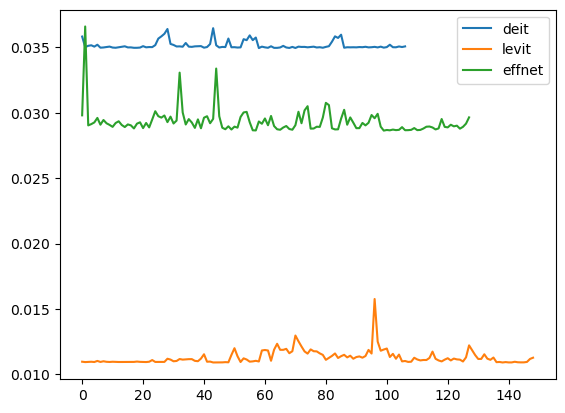

In [5]:
plt.plot(df[sel_columns_cpu])
plt.legend(['deit','levit','effnet'])
#plt.axhline(cpu_median['deit_cpu'],color='blue')
#plt.axhline(cpu_median['levit_cpu'],color='orange')
#plt.axhline(cpu_median['effnet_cpu'],color='green')

Text(0, 0.5, 'Anz. Ergebnisse')

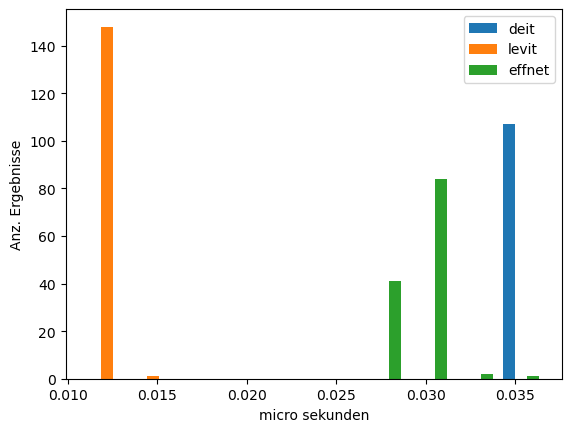

In [6]:
plt.hist(df[sel_columns_cpu])
plt.legend(['deit','levit','effnet'])
plt.xlabel('micro sekunden')
plt.ylabel('Anz. Ergebnisse')

In [7]:
gpu_mean = df[sel_columns_gpu].mean()
gpu_median = df[sel_columns_gpu].median()
print(gpu_mean)
print()
print(gpu_median)

deit_gpu_16      0.000734
levit_gpu_16     0.000913
effnet_gpu_16    0.000880
dtype: float64

deit_gpu_16      0.000608
levit_gpu_16     0.000834
effnet_gpu_16    0.000874
dtype: float64


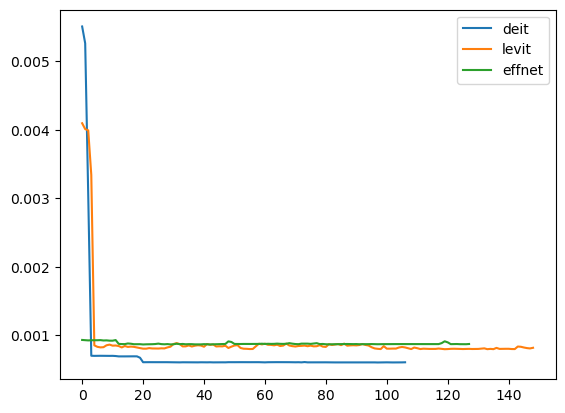

In [8]:
plt.plot(df[sel_columns_gpu])
plt.legend(['deit','levit','effnet'])
#plt.axhline(gpu_median['deit_gpu'],color='blue')
#plt.axhline(gpu_median['levit_gpu'],color='orange')
#plt.axhline(gpu_median['effnet_gpu'],color='green')

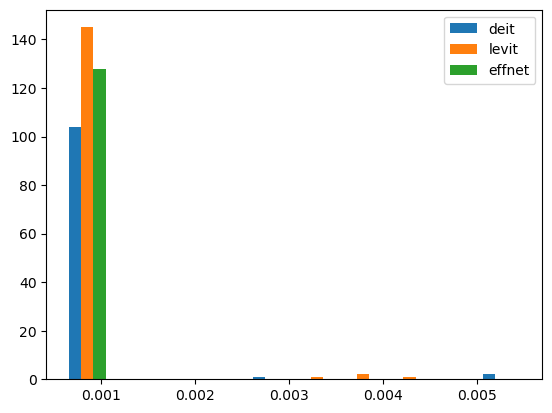

In [9]:
plt.hist(df[sel_columns_gpu])
plt.legend(['deit','levit','effnet'])

In [10]:
def split_df(df, col_str):
    filter_col = [col for col in df if col.startswith(col_str)]
    res = df[filter_col].median()
    
    index = pd.Index(range(1,1+len(filter_col)))
    res = res.set_axis(pd.Index(index))
    return res

0.035976612083262194
0.011181152604081031
0.029251547499961804


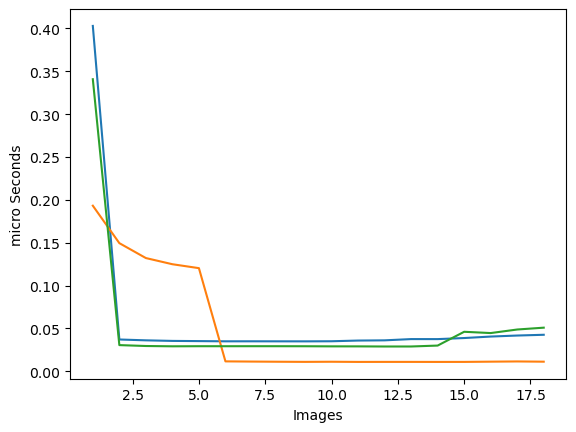

In [11]:


df_deit_cpu = split_df(df,'deit_cpu')
df_deit_gpu = split_df(df,'deit_gpu')
df_levit_cpu = split_df(df,'levit_cpu')
df_levit_gpu = split_df(df,'levit_gpu')
df_effnet_cpu = split_df(df,'effnet_cpu')
df_effnet_gpu = split_df(df,'effnet_gpu')

plt.plot(df_deit_cpu)
plt.plot(df_levit_cpu)
plt.plot(df_effnet_cpu)

plt.xlabel('Images')
plt.ylabel('micro Seconds')

print(df_deit_cpu.iloc[0:16].median())
print(df_levit_cpu.iloc[0:16].median())
print(df_effnet_cpu.iloc[0:16].median())


0.0006119708332334968
0.00577999687485923
0.0011783979167224313


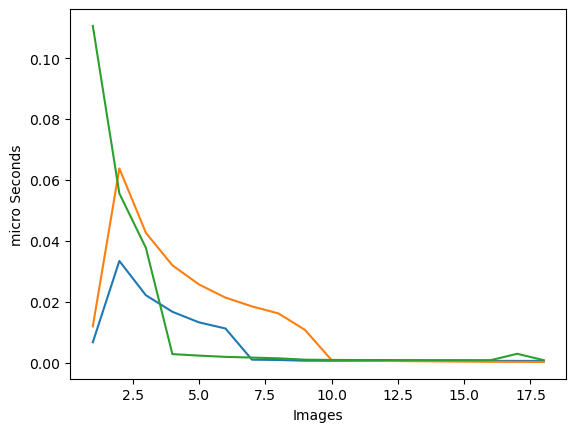

In [12]:
plt.plot(df_deit_gpu)
plt.plot(df_levit_gpu)
plt.plot(df_effnet_gpu)

plt.xlabel('Images')
plt.ylabel('micro Seconds')

print(df_deit_gpu.median())
print(df_levit_gpu.median())
print(df_effnet_gpu.median())

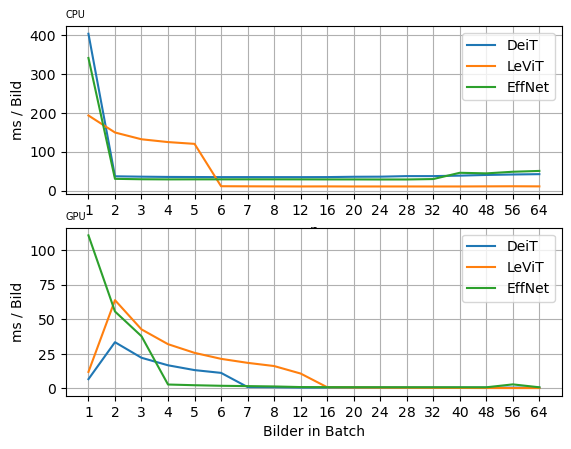

In [21]:
font_size = 7
fig, axs = plt.subplots(2,1)

x_scale = [1,2,3,4,5,6,7,8,12,16,20,24,28,32,40,48,56,64]
x = range(1,1+len(x_scale))
axs[0].set_title('CPU', fontsize=font_size, loc='left')
axs[0].plot(df_deit_cpu*1000)
axs[0].plot(df_levit_cpu*1000)
axs[0].plot(df_effnet_cpu*1000)
axs[0].set_xlabel('n')
axs[0].set_ylabel('ms / Bild')
axs[0].grid(True)
axs[0].legend(['DeiT','LeViT','EffNet'])
axs[0].set_xticks(x,x_scale)

axs[1].set_title('GPU', fontsize=font_size, loc='left')
axs[1].plot(df_deit_gpu*1000)
axs[1].plot(df_levit_gpu*1000)
axs[1].plot(df_effnet_gpu*1000)
axs[1].set_xlabel('Bilder in Batch')
axs[1].set_ylabel('ms / Bild')
axs[1].grid(True)
axs[1].legend(['DeiT','LeViT','EffNet'])
axs[1].set_xticks(x,x_scale)

fig.savefig('figs/Inference.jpg')

In [20]:
for i in range(16,65,8):
    deit = pd.read_csv(f'../../networks/birds_deit/inference_time/n{i}.csv',sep=';') / i
    levit = pd.read_csv(f'../../networks/birds_levit/inference_time/n{i}.csv',sep=';') / i
    effnet = pd.read_csv(f'../../networks/birds_effnet/inference_time/n{i}.csv',sep=';') / i

    deit_median = deit.median()
    levit_median = levit.median()
    effnet_median = effnet.median()
    
    #print(f'[{i}][CPU]\tDeit: {deit_median.cpu} LeViT: {levit_median.cpu} EffNet: {effnet_median.cpu}')
    print(f'[{i}][GPU]\tDeit: {deit_median.gpu} LeViT: {levit_median.gpu} EffNet: {effnet_median.gpu}')

print()

for i in range(16,65,8):
    deit = pd.read_csv(f'../../networks/birds_deit/inference_time/n{i}.csv',sep=';') / i
    levit = pd.read_csv(f'../../networks/birds_levit/inference_time/n{i}.csv',sep=';') / i
    effnet = pd.read_csv(f'../../networks/birds_effnet/inference_time/n{i}.csv',sep=';') / i

    deit_median = deit.median()
    levit_median = levit.median()
    effnet_median = effnet.median()
    
    print(f'[{i}][CPU]\tDeit: {deit_median.cpu} LeViT: {levit_median.cpu} EffNet: {effnet_median.cpu}')
    #print(f'[{i}][GPU]\tDeit: {deit_median.gpu} LeViT: {levit_median.gpu} EffNet: {effnet_median.gpu}')

[16][GPU]	Deit: 0.0006082499999138188 LeViT: 0.0008319875000779562 EffNet: 0.0008738593750194906
[24][GPU]	Deit: 0.0005966666667518416 LeViT: 0.0005406458334012583 EffNet: 0.0008294395832611668
[32][GPU]	Deit: 0.0005642749999879 LeViT: 0.0004017718749764734 EffNet: 0.0008156453125138781
[40][GPU]	Deit: 0.00056109249999281 LeViT: 0.00031739500000185 EffNet: 0.0008048950000556926
[48][GPU]	Deit: 0.0005607416666559083 LeViT: 0.0002608270833282698 EffNet: 0.0007928927083563999
[56][GPU]	Deit: 0.0005556276785552777 LeViT: 0.0002286232142328759 EffNet: 0.0028925392857023055
[64][GPU]	Deit: 0.0005455374999883125 LeViT: 0.0002182671875061703 EffNet: 0.0007888171874697031

[16][CPU]	Deit: 0.03503781874997003 LeViT: 0.01099356250006167 EffNet: 0.029081431250006062
[24][CPU]	Deit: 0.03610159166661712 LeViT: 0.010966829166742778 EffNet: 0.028912927083335187
[32][CPU]	Deit: 0.037536382812447755 LeViT: 0.010927714062518135 EffNet: 0.030000173437485955
[40][CPU]	Deit: 0.03879194000001007 LeViT: 0.010

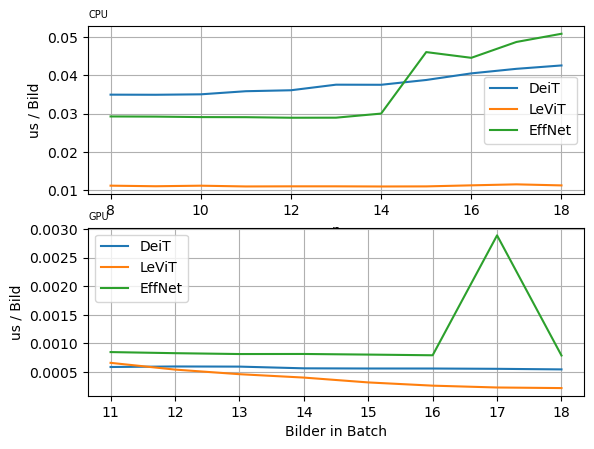

In [17]:
font_size = 7
fig, axs = plt.subplots(2,1)

axs[0].set_title('CPU', fontsize=font_size, loc='left')
axs[0].plot(df_deit_cpu.iloc[7:])
axs[0].plot(df_levit_cpu.iloc[7:])
axs[0].plot(df_effnet_cpu.iloc[7:])
axs[0].set_xlabel('n')
axs[0].set_ylabel('us / Bild')
axs[0].grid(True)
axs[0].legend(['DeiT','LeViT','EffNet'])


axs[1].set_title('GPU', fontsize=font_size, loc='left')
axs[1].plot(df_deit_gpu.iloc[10:])
axs[1].plot(df_levit_gpu.iloc[10:])
axs[1].plot(df_effnet_gpu.iloc[10:])
axs[1].set_xlabel('Bilder in Batch')
axs[1].set_ylabel('us / Bild')
axs[1].grid(True)
axs[1].legend(['DeiT','LeViT','EffNet'])
